In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)
from IPython.display import display, clear_output
np.seterr(all='warn')
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as plt3d


In [215]:
"""
data = pd.read_csv('ex1data1.csv')
temp_X = data.iloc[:,0]
temp_Y = data.iloc[:,1]
"""
# Predecir nota de writing con base en Reading,Math
data = pd.read_csv('student.csv')
NUMBER_VARIABLES = np.size(data,1) -1
temp_X = data.iloc[:,0:NUMBER_VARIABLES].values
temp_Y = data.iloc[:,-1].values.reshape(len(temp_X),1)

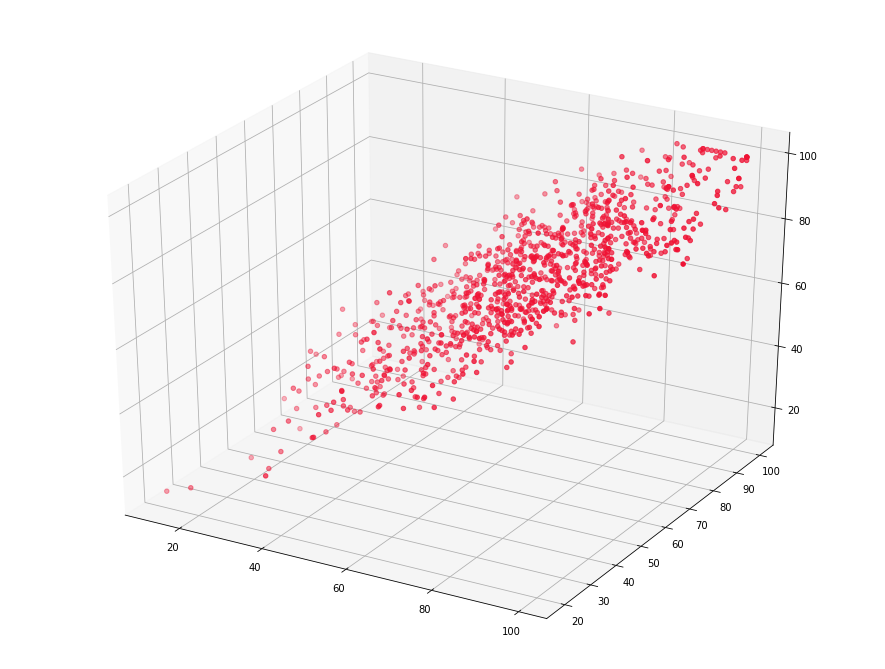

In [216]:

"""
plt.scatter(temp_X,temp_Y)
plt.xlabel('population')
plt.ylabel('profit')
plt.show
"""

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(temp_X[:,0], temp_X[:,1], temp_Y, color='#ef1234')
plt.show()

### Organizar las matrices

In [225]:
"""
X= temp_X.values
X = X.reshape(len(X),1)
unos = np.array([np.ones(len(X))])
X = np.concatenate((unos.T, X), axis=1)
W = np.array([np.zeros(np.size(X,1))])
Y = temp_Y.values
Y = Y.reshape(len(Y),1)
X.shape,Y.shape,W.shape

"""
X = temp_X
Y = temp_Y
unos = np.array([np.ones(len(X))])
X = np.concatenate((unos.T, X), axis=1)
W = np.array([np.zeros(np.size(X,1))])


### Funcion de costo

In [226]:
def cost(X,W,Y):
    m = np.size(X,0)
    k= 1/(2*m)
    J = k*sum((np.dot(X,W)-Y)**2)
    return J

In [227]:
print(cost(X,W.T,Y))

[2470.11]


### Gradiente Descendiente

In [228]:
def grad_traditional(X,Y,W,iterations,alpha):    
    m = np.size(X,0)
    k = alpha*(1/m)
    history_cost = [0] * iterations
    for i in range(iterations):        
        for w in range(np.size(W,0)):
                Xij = X[:,w]
                Xij = Xij.reshape(len(Xij),1)
                H = np.dot(X,W)
                suma = sum((H-Y)*Xij)
                W[w] =  W[w]-(k*suma)
                history_cost[i]=cost(X,W,Y)
    return W,history_cost

In [229]:
W_result, H_Cost = grad_traditional(X,Y,W.T,100000,0.0001)

In [247]:
W_result

array([[-0.47865456],
       [ 0.09137247],
       [ 0.90144567]])

TypeError: object of type 'numpy.float64' has no len()

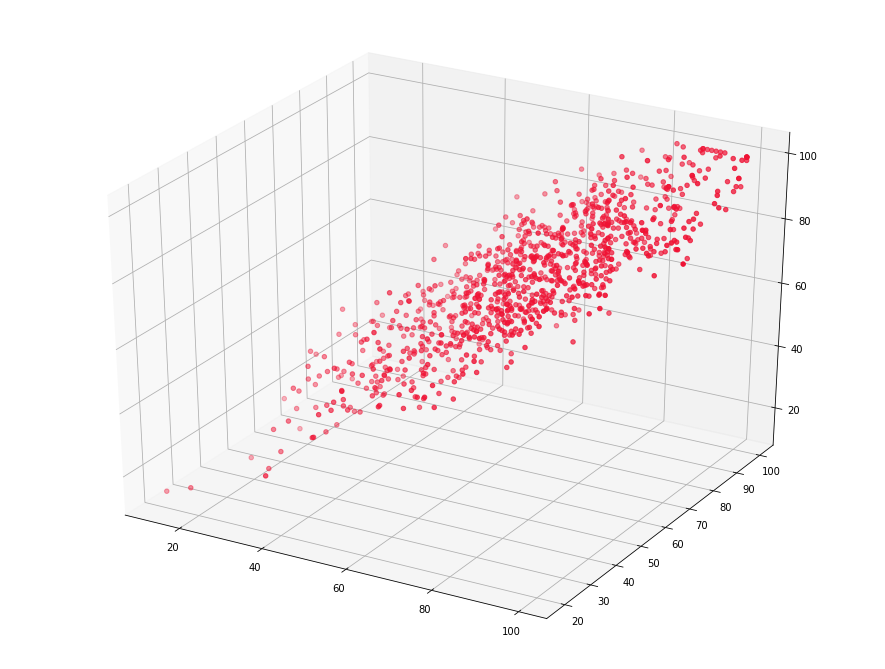

In [258]:
"""
Y_pred = np.dot(X,W.T)
plt.scatter(X[:,1],Y)
plt.plot([min(X[:,1]), max(X[:,1])], [min(Y_pred), max(Y_pred)], color='red')
plt.show()
"""


# Ploting the scores as scatter plot
Y_pred = np.dot(X,W.T)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(temp_X[:,0], temp_X[:,1], temp_Y, color='#ef1234')
plt.plot(X[:,1][0],X[:,1][999],X[:,2][0],X[:,2][999],Y_pred[0],Y_pred[999],'-') #scatter plot
#ax.plot([min(X[:,1]), max(X[:,1])],[min(X[:,2]), max(X[:,2])], [min(Y_pred), max(Y_pred)], color='red')
plt.show()

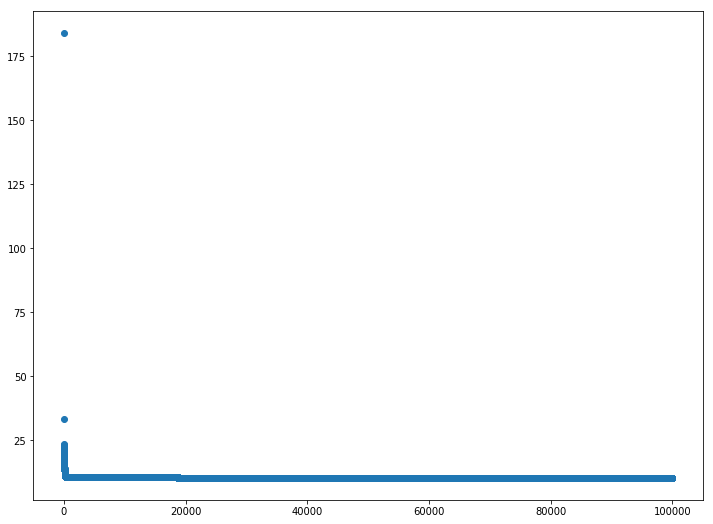

In [251]:
plt.scatter(list(range(100000)),H_Cost)